In [8]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tcheading">Table Of Contents</h1>
<div id ="toc"></div>

# Naive Bayes Classifier Problem

## Time Tracking
* Tuesday: 1 hour
* Thursday: 1 hour

## Background

Only modify main.py above plumbing. This is a Naive Bayes Problem. Feel free to look at the rest of the stuff.

**Task**:
* Binary classifier has been written (and obfuscated)
* Classifier takes two dimensional input
* Model, when trained on "SQUASHED" set, obtains 1-2% training error

**Problem**
* No proper cross-validation for accuracy metric - only 50% accuracy on testing set
* Classifier is assumed to use categorical approach (which is terrible)
    * Having badly written code in a respository which cannot be understood is a bad business decision, assuming that the time to write (or re-write) important production code is small
* Use machine learning fundamentals knowlege + meta-algorithms and data processing to allow the original classifier as written to work

**Constraints**
* Only modify main.py above "Plumbing" comment
* Focus on 'train' and 'predict' functions
* Only use numpy + core python
* Code should call at least once, 'train' and 'predict'
    * original 'train' and 'predict' currently just pass data to the bayes classifier
* Aim for lowest error values on test data as possible
    * At most 15% average is good goal

**Submit**
* main.py and 3-4 sentence description of exercise. If >2 hours, submit longer description of analysis, approaches tried, best results, and next steps.

## Notes
Naive Bayes will overfit if the data is collinear (nerd-speak for linearly related). For multicollinear data, we may be able to use linear regression and obtain the varience from the data to compare things that are not correllated.

This is a feature engineering problem, since we cannot change the categorical nature of Naive Bayes under the hood. We are told that the classifier is using a categorical Naive Bayes approach under the hood.The code is obfuscated, so its tough to see how the catigorization is actually being done.


# Data Exploration
My first thought regarding the issue of a naive bayes classifier being "too accurate" is that that training data and the testing data are too similar. Another possibility is that the features are highly correllated. Thus, we extract the raw features from the text-file, and observe them.

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
import mnbayes as classifier
import numpy as np
import random as rand
from math import log
from math import fabs
import seaborn
import scipy.stats as st

def get_feature_arrays(filename):
    val1 = []
    val2 = []
    
    # Labled Dictionary of Features
    # label (0) - np_array
    # label {1} - np_array
    features = {0:([],[]),1:([],[])}
    with open(filename,'r') as in_file:
        for line in in_file.readlines():
            values = line.split(',')
            (data,label) = values[1].split(':')
            data_1 = float(values[0])
            data_2 = float(data)
            label = int(label)
            features[label][0].append(data_1)
            features[label][1].append(data_2)
    data_0_x = np.array(features[0][0])
    data_0_y = np.array(features[0][1])
    data_1_x = np.array(features[1][0])
    data_1_y = np.array(features[1][1])
    return (data_0_x,data_0_y,data_1_x,data_1_y)

def plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y):
    plt.scatter(data_1_x,data_1_y,color='red')
    plt.scatter(data_0_x,data_0_y,color='blue')
    plt.title('Feature Y vs Feature X, Label 0: blue, Label 1: red')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.scatter(data_1_x,data_1_y,color='pink')
    plt.scatter(data_0_x,data_0_y,color='pink')
    plt.title('Feature Y vs Feature X, no labels')
    plt.figure(figsize=(8,8))
    plt.show()

    
    plt.hist(data_1_x)
    plt.title('Distribution Feature X, Label 1')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_1_y)
    plt.title('Distribution Feature Y, Label 1')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_0_x)
    plt.title('Distribution Feature X, Label_0')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_0_y)
    plt.title('Distribution Feature Y, Label 0')
    plt.figure(figsize=(8,8))   
    plt.show()

    plt.scatter(data_0_x,data_1_x,color='green')
    plt.scatter(data_0_y,data_1_y,color='orange')
    plt.title('Correlation Between Features')
    plt.xlabel('Label: 0')
    plt.ylabel('Label: 1')
    plt.figure(figsize=(8,8))
    plt.show()    




# The SQUASHED Data Set

Loading Testing/Training Data:


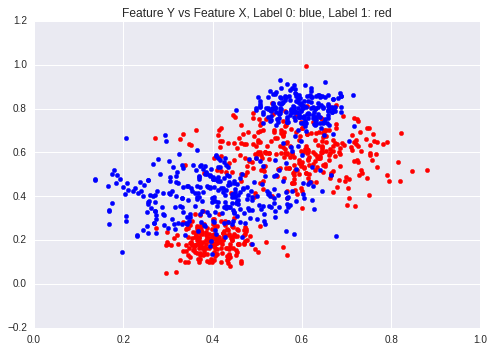

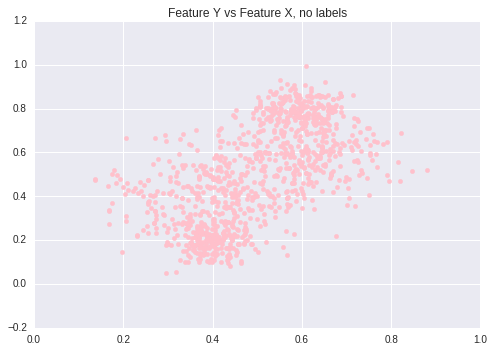

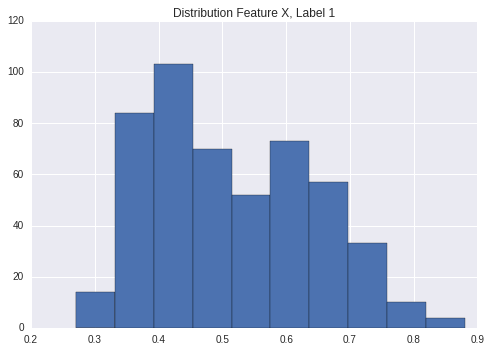

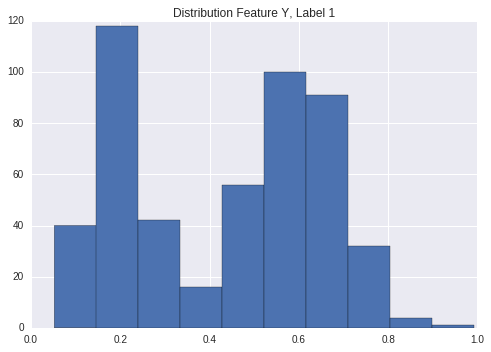

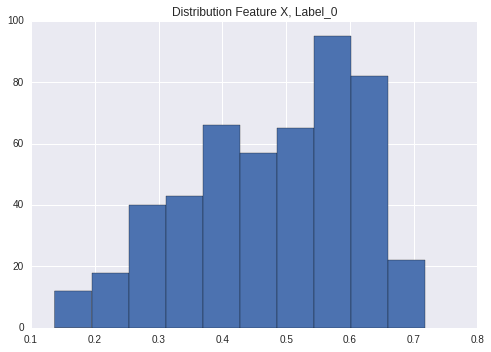

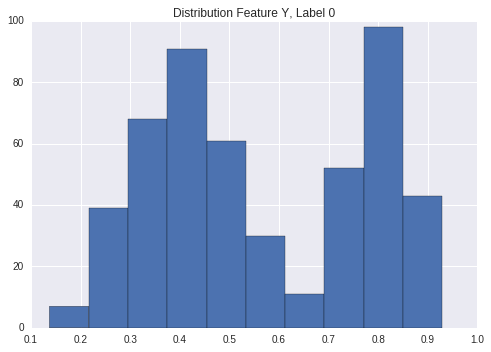

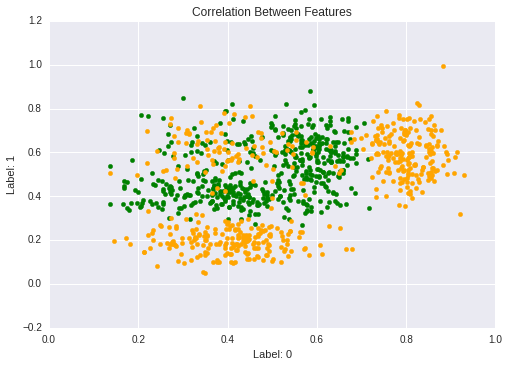

LinregressResult(slope=1.1262379672711036, intercept=-0.14336764905990479, rvalue=0.66667471581676607, pvalue=1.4560340606396556e-65, stderr=0.056423634905872259)
LinregressResult(slope=1.0496038850691014, intercept=0.060452563983365737, rvalue=0.67068451858856271, pvalue=1.2932291666752892e-66, stderr=0.052017056679270895)
0.477709901805
0.134551632473
0.561858732854
0.210569816765
0.515339663834
0.127272695371
0.437027446391
0.215006416656


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a704115d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2a6f25e190>]], dtype=object)

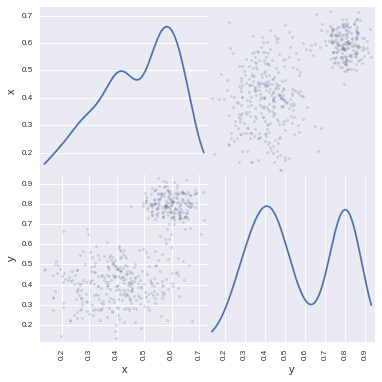

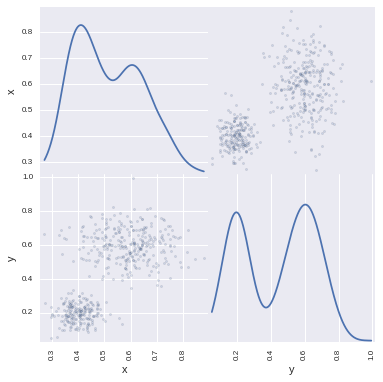

In [10]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

print "Loading Testing/Training Data:"
(data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('SQUASHED')
plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)
print st.linregress(data_1_x,data_1_y)
print st.linregress(data_0_x,data_0_y)
# Concatenate both arrays for x and y to check for correlation (there is obviously corellation)

df_0 = pd.DataFrame({'x':data_0_x,'y':data_0_y})
df_1 = pd.DataFrame({'x':data_1_x,'y':data_1_y})

# Statistics
data_0_x_mean = data_0_x.mean()
data_0_x_std_dev = data_0_x.std()
data_0_y_mean = data_0_y.mean()
data_0_y_std_dev = data_0_y.std()

data_1_x_mean = data_1_x.mean()
data_1_x_std_dev = data_1_x.std()
data_1_y_mean = data_1_y.mean()
data_1_y_std_dev = data_1_y.std()


# print "Loading XOR Data:"
# (data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
# plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)

# Show 'em
print data_0_x_mean
print data_0_x_std_dev
print data_0_y_mean
print data_0_y_std_dev

print data_1_x_mean
print data_1_x_std_dev
print data_1_y_mean
print data_1_y_std_dev

scatter_matrix(df_0, alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix(df_1, alpha=0.2, figsize=(6, 6), diagonal='kde')
 

# The XOR Data Set

Loading Testing/Training Data:


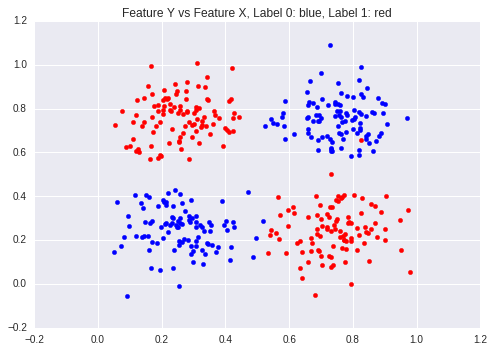

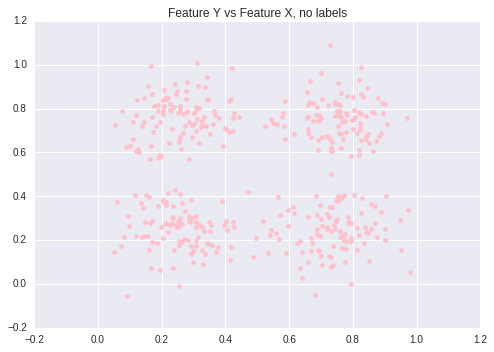

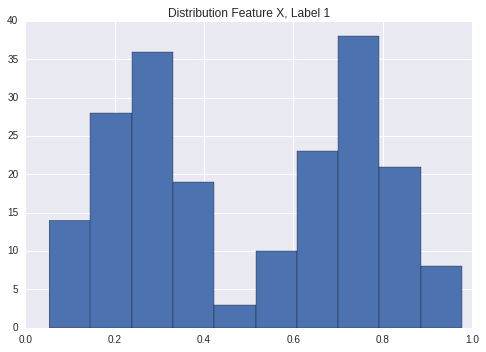

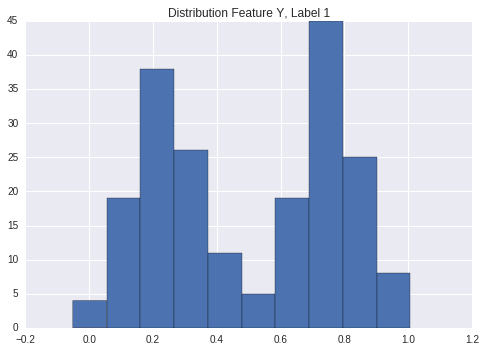

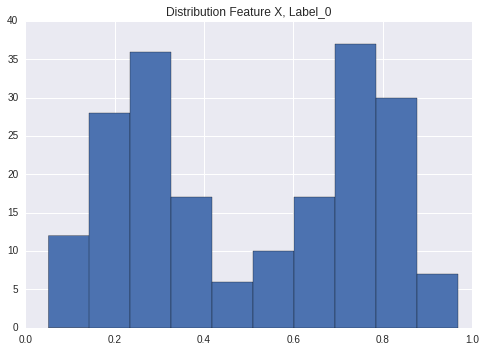

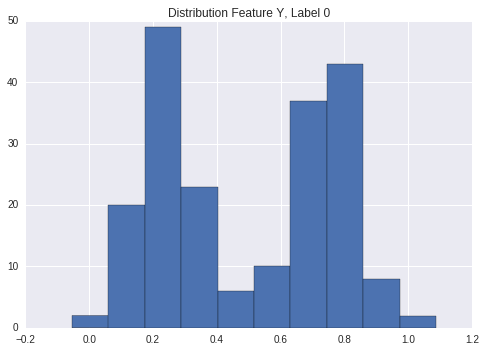

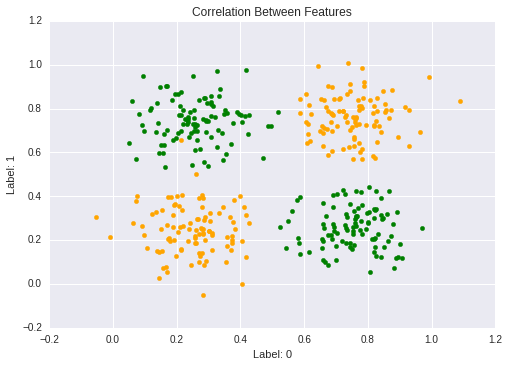

LinregressResult(slope=-0.89976622589430721, intercept=0.9538058008273953, rvalue=-0.84555090440154479, pvalue=7.2658470721476064e-56, stderr=0.040375046241073791)
LinregressResult(slope=0.88625348540369464, intercept=0.052272940306311688, rvalue=0.86757012748545947, pvalue=5.585588732177892e-62, stderr=0.036103741500689485)
0.505898464446
0.263437232544
0.500627217682
0.269110424772
0.500326292212
0.261054142566
0.503629101168
0.277792501182


NameError: name 'df' is not defined

In [4]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

print "Loading Testing/Training Data:"
(data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)
print st.linregress(data_1_x,data_1_y)
print st.linregress(data_0_x,data_0_y)
# Concatenate both arrays for x and y to check for correlation (there is obviously corellation)

df_0 = pd.DataFrame({'x':data_0_x,'y':data_0_y})
df_1 = pd.DataFrame({'x':data_1_x,'y':data_1_y})

# Statistics
data_0_x_mean = data_0_x.mean()
data_0_x_std_dev = data_0_x.std()
data_0_y_mean = data_0_y.mean()
data_0_y_std_dev = data_0_y.std()

data_1_x_mean = data_1_x.mean()
data_1_x_std_dev = data_1_x.std()
data_1_y_mean = data_1_y.mean()
data_1_y_std_dev = data_1_y.std()


# print "Loading XOR Data:"
# (data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
# plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)

# Show 'em
print data_0_x_mean
print data_0_x_std_dev
print data_0_y_mean
print data_0_y_std_dev

print data_1_x_mean
print data_1_x_std_dev
print data_1_y_mean
print data_1_y_std_dev
df.head()

scatter_matrix(df_0, alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix(df_1, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Edit This Code:

In [46]:
% matplotlib inline
import matplotlib.pyplot as plt
import mnbayes as classifier
import numpy as np
import random as rand
import seaborn
from math import log
from math import fabs
from math import sqrt
from math import exp


def gaus(x,std_dev,avg):
    norm = 1.0/(sqrt(2*3.1415))
    gaus = exp(-(x-avg)**2./(2.*std_dev**2))
    return norm*gaus
    

# Option 0 - Default
def predict(input):
#     #Debug the debug visualization
#     return 0 if input[0] < .25 else 1
    #print input
    input[0] = input[0]
    input[1] = input[1]*1000
    return classifier.predict(input)

def train(input, output):
    # input: the features input[0],input[1]
    # output: the label of the features associated with input
    input[0] = input[0]
    input[1] = input[1]*1000
    classifier.train(input, output)


# Option 1 - Multiply Features Together to account for correlation
# Decreases testing uncertainty to 30%
# def predict(input):
# #     #Debug the debug visualization
# #     return 0 if input[0] < .25 else 1
#     #print input
    
#     # Test for correlation of the features
#     input[0] = input[0]*input[1]
#     input[1] = 1
    
#     return classifier.predict(input)

# def train(input, output):
#     # input: the features input[0],input[1]
#     # output: the label of the features associated with input
#     input[0] = input[0]*input[1]
#     input[1] = 1
   
#     classifier.train(input, output)

# Option 2 - Log of both features
# Does not perform well
# def predict(input):
# #     #Debug the debug visualization
# #     return 0 if input[0] < .25 else 1
#     #print input
    
#     # Test for correlation of the features
#     input[0] = log(fabs(input[0])+1.)
#     input[1] = log(fabs(input[1])+1.)
    
#     return classifier.predict(input)

# def train(input, output):
#     # input: the features input[0],input[1]
#     # output: the label of the features associated with input
#     input[0] = log(fabs(input[0])+1.0)
#     input[1] = log(fabs(input[1])+1.0)
   
#     classifier.train(input, output)
    
# Option 3 - Create PDFs from Numeric Data Set
# def predict(input):
# #     #Debug the debug visualization
# #     return 0 if input[0] < .25 else 1
#     #print input
    
#     # Test for correlation of the features
#     input[0] = log(fabs(input[0])+1.)
#     input[1] = log(fabs(input[1])+1.)
    
#     return classifier.predict(input)

# def train(input, output):
#     # input: the features input[0],input[1]
#     # output: the label of the features associated with input
#     input[0] = log(fabs(input[0])+1.0)
#     input[1] = log(fabs(input[1])+1.0)
   
#     classifier.train(input, output)

# Run The Classifier
Note that I have wrapped the "do not modify" portion of the code into a function, as well as added a return value so that the classifier's performance can be studied over a large number of trials. The code has not been changed meaningfully, in the spirit of the problem. Additionally, I have moved the "reset" into the function to prevent weird shit from happening.

* Non-meaningful changes include:
    * wrapped into function
    * added an option to turn off printing
    * added return values to allow for study many iterations of classifier

In [47]:
def run_classifier(DEBUG_VISUALIZATION = True, verbose = True, PROBLEM = "SQUASHED"):
    classifier.reset() # Needs to be here, for multiple runs

    if verbose: print "Reading input"

    file_stream = open(PROBLEM, 'r')
    full_text = file_stream.read();

    train_set = []
    test_set = []

    lines = full_text.split("\n")
    for line in lines:
        if line:
            input_output = line.split(":")

            # Get just the two values
            input = input_output[0].split(",")
            
            # Convert the values to floats. Lambda applies float(x) to each
            # x in interable 'input'
            input = map(lambda x : float(x), input)

            # output contains the classification for the input
            output = float(input_output[1])    
            
            # example_dest = [ ([<float>feature_1,<float>feature_2],<float> label) ... ]
            # pipes a labled feature set to either the testing, or the training data set
            # depending on whether or not rand.randint(0,1) yields 0 or 1.
            example_dest = test_set if rand.randint(0, 1) == 1 else train_set
            example_dest.append((input, output))

    if verbose: print "Training..."
    for x, y in train_set:
        train(x, y)
    # train([x for x, y in train_set], [y for x, y in train_set])

    if verbose: print "Predicting..."
    correct = 0
    # xrange is more 'efficienct' than range for large lists.
    # train_set[i][0] -> a feature set
    # train_set[i][1] -> the label for that feature set
    
    for i in xrange(len(train_set)):
        # predict(train_set[i][0]) + 0.5 gives us a number between 0.5 and 1.5
        # we truncate it to a label with int, which cuts off anything after
        # the decimal place.
        if int(predict(train_set[i][0]) + .5) == train_set[i][1]:
            correct += 1
    train_error = 100 - 100.0 * correct / len(train_set)
    if verbose: print "Train:", str(train_error) + "% error"

    correct = 0
    for i in xrange(len(test_set)):
        if int(predict(test_set[i][0]) + .5) == test_set[i][1]:
            correct += 1
    test_error = 100 - 100.0 * correct / len(test_set)
    if verbose: print "Test:", str(test_error) + "% error"

    if DEBUG_VISUALIZATION:
        if verbose: print "Drawing...\n\n"

        # Draw the color background grid
        GRID_MAX = 1.2
        GRID_MIN = -.2
        GRID_DELTA = .02

        GRID_MAX += GRID_DELTA
        grid_x, grid_y = np.meshgrid(np.arange(GRID_MIN, GRID_MAX, GRID_DELTA), np.arange(GRID_MIN, GRID_MAX, GRID_DELTA))
        colors = np.zeros((len(grid_x), len(grid_y)))
        for x in xrange(len(grid_x)):
            for y in xrange(len(grid_y)):
                colors[x][y] = predict([grid_x[x][y], grid_y[x][y]])
        cdict = {'red': ((0.0, 1.0, 1.0),
                         (1.0, 0.5, 0.5)),
                 'green': ((0.0, 0.5, 0.5),
                           (1.0, 0.5, 0.5)),
                 'blue': ((0.0, 0.5, 0.5),
                          (1.0, 1.0, 1.0))}
        plt.register_cmap(name='muted_rdbl', data=cdict)
        plt.pcolormesh(grid_x, grid_y, colors, cmap='muted_rdbl')

        # Scatter plot of examples
        input = [u for u, v in test_set]
        output = np.array([v for u, v, in test_set])
        x = np.array([u[0] for u in input])
        y = np.array([u[1] for u in input])
        colors = ['r', 'b']
        color_values = [colors[int(c) % len(colors)] for c in output]
        plt.scatter(x, y, color=color_values)
        plt.show()
    return (train_error,test_error)

## Default with Visualization

Reading input
Training...
Predicting...
Train: 48.8888888889% error
Test: 51.0891089109% error
Drawing...




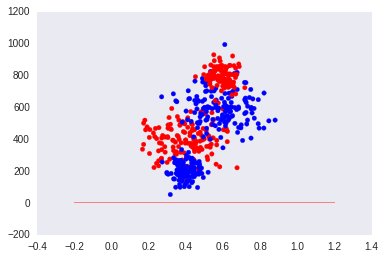

(48.888888888888886, 51.08910891089109)

In [48]:
run_classifier(True,True,'SQUASHED')

## Now run 100 times (this frame was run with default settings)

In [9]:
training_errors = []
testing_errors = []
for i in range(0,100):
    (train_error,test_error) = run_classifier(False,False,'SQUASHED')
    training_errors.append(train_error)
    testing_errors.append(test_error)

# Understanding Current Performance
Here, we look at the classifier's output for 100 trials where we check the distribution of the training error, and the testing error.

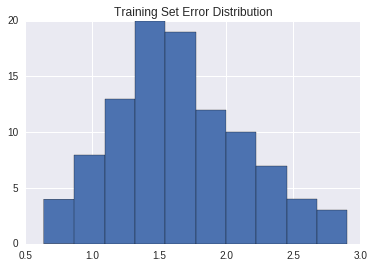

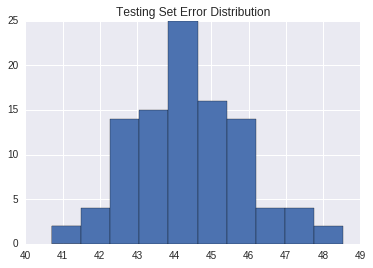

training mean error: 1.64418235868
testing mean error: 44.3993643722


In [10]:
test_errs = np.array(testing_errors)
train_errs = np.array(training_errors)
plt.hist(train_errs)
plt.title('Training Set Error Distribution')
plt.show()
plt.hist(np.array(test_errs))
plt.title('Testing Set Error Distribution')
plt.show()

print 'training mean error:',np.mean(train_errs)
print 'testing mean error:',np.mean(test_errs)